<a href="https://colab.research.google.com/github/AMAN690/Inventoplus_XE_HACK_007/blob/master/CustomerSatisfactionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('Ecommerce Customers.csv')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data['Avatar'].value_counts(normalize=True)

SlateBlue        0.014
Cyan             0.014
Teal             0.014
GreenYellow      0.014
CadetBlue        0.014
                 ...  
PapayaWhip       0.002
PaleGoldenRod    0.002
DeepSkyBlue      0.002
PaleGreen        0.002
Red              0.002
Name: Avatar, Length: 138, dtype: float64

In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc22868110>,
      dtype=object)

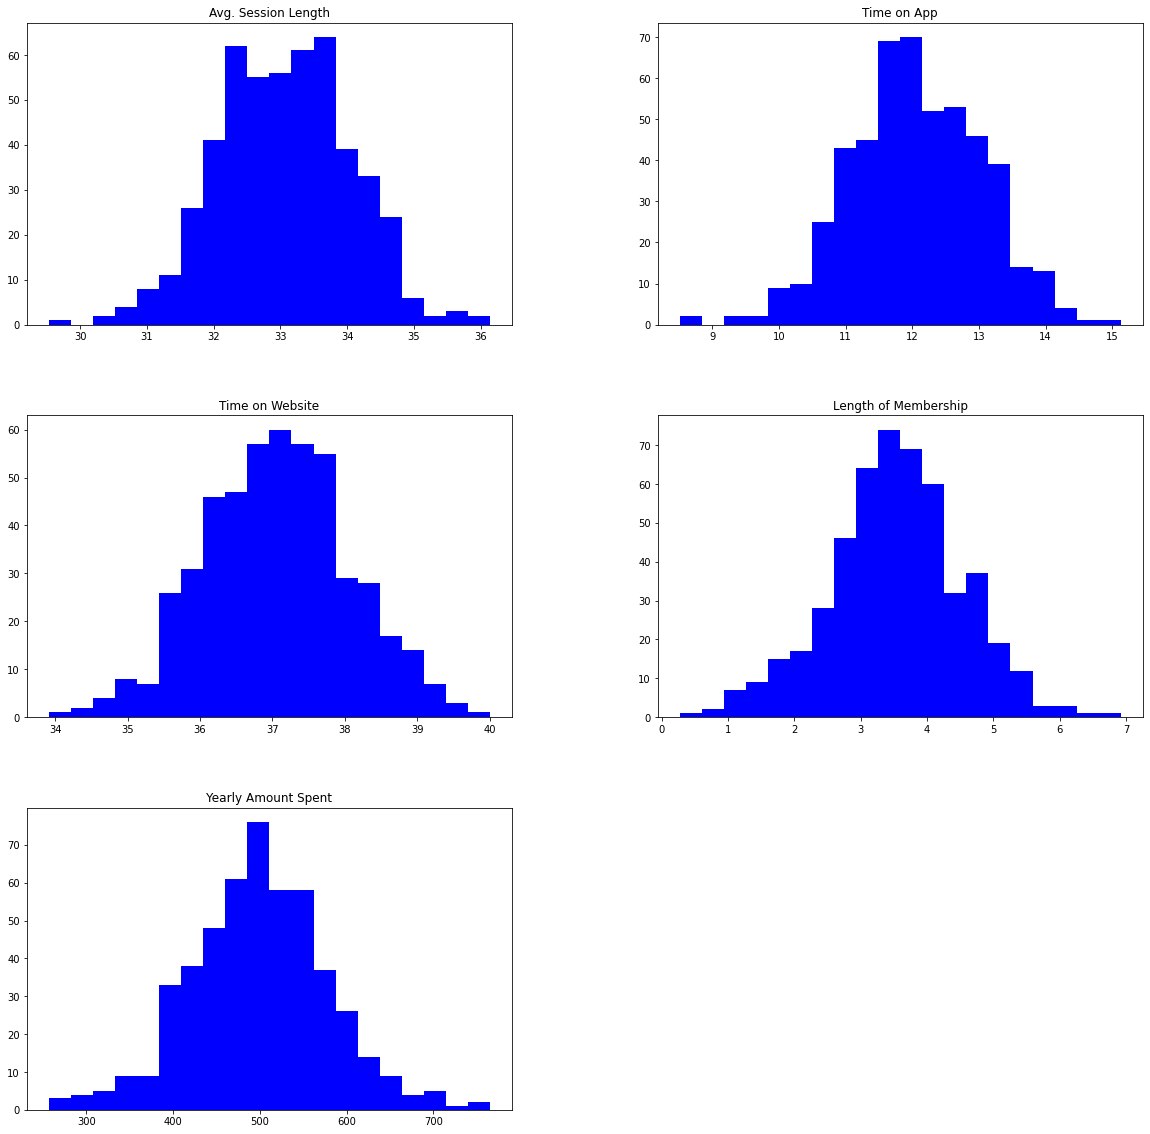

In [11]:
data.hist(bins=20,grid = False,figsize=(20,20),color='blue')

In [12]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

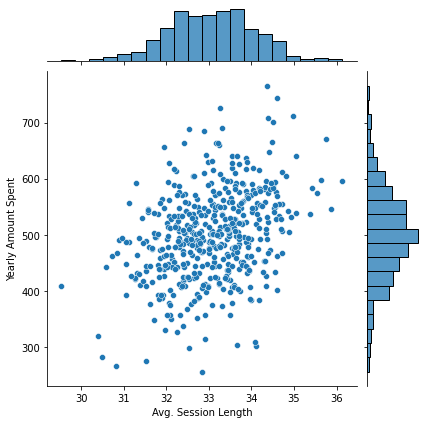

In [14]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',kind="scatter",data=data)

Correlation

In [15]:
data1 = data['Avg. Session Length']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.36


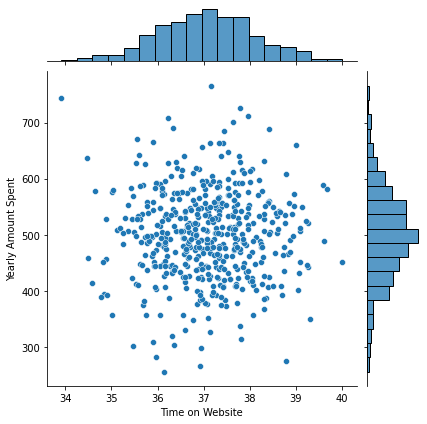

In [17]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',kind="scatter",data=data)

In [19]:
data1 = data['Time on Website']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
print("No correlation")

Pearsons correlation: -0.003
No correlation


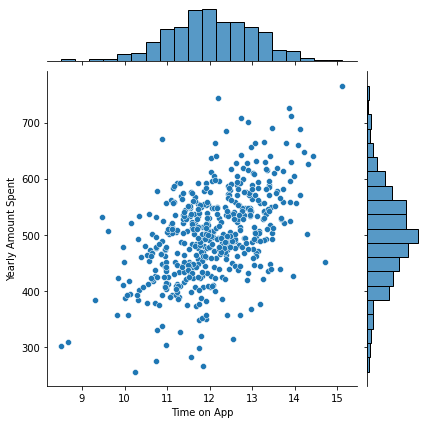

In [21]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',kind="scatter",data=data)

In [23]:
data1 = data['Time on App']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)
print("Strong correlation")

Pearsons correlation: 0.50
Strong correlation


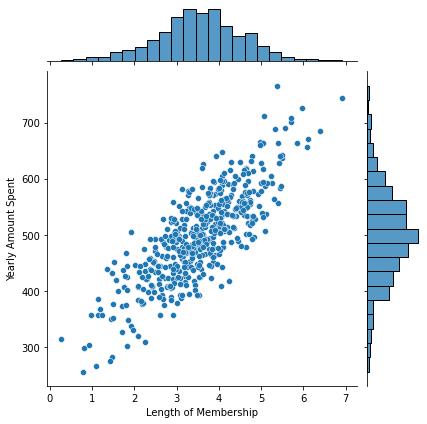

In [25]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',kind="scatter",data=data)

In [27]:
data1 = data['Length of Membership']
data2 = data['Yearly Amount Spent']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.2f' % corr)
print("Strong correlation")

Pearsons correlation: 0.81
Strong correlation


summary

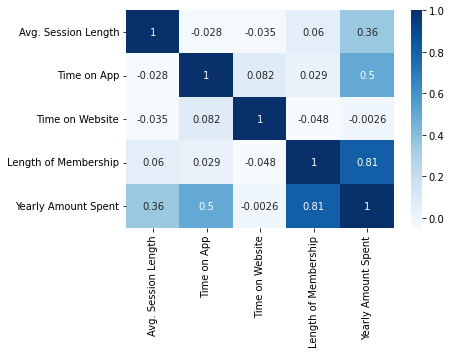

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

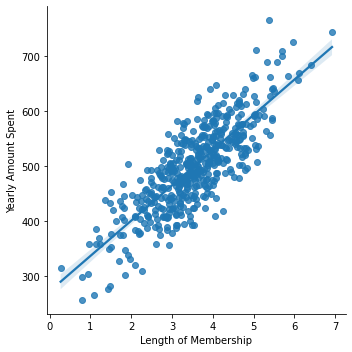

In [42]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [44]:
y = data['Yearly Amount Spent']
x = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
coef=pd.DataFrame([x_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

,Attributes,Coefficients
0,Avg. Session Length,25.5963
1,Time on App,38.7853
2,Time on Website,0.310386
3,Length of Membership,61.8968


In [53]:
coef=pd.DataFrame([x_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

,Attributes,Coefficients
0,Avg. Session Length,25.5963
1,Time on App,38.7853
2,Time on Website,0.310386
3,Length of Membership,61.8968


In [56]:
#predictions
ytest_pred = reg.predict(x_test)

In [57]:
from sklearn import metrics
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

R^2:  0.9782625350414403
MAE:  8.558441885315245
MSE:  109.86374118394055
RMSE:  10.481590584636502
Max Error:  30.229561110589486


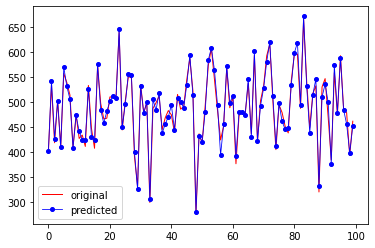

In [58]:
#prediction 
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=1, color="red", label="original")
plt.plot(x_ax, ytest_pred, lw=0.8, color="blue", label="predicted",marker="o", markersize=4)
plt.legend()
plt.show()

In [60]:
#prediction of spent and actual spent by customers
ecommerce_plot = pd.DataFrame({'pred_spent': ytest_pred, 'actual_spent': y_test})
ecommerce_plot.head()

,pred_spent,actual_spent
361,402.862301,401.033135
73,542.533257,534.777188
374,426.620119,418.602742
155,501.913864,503.978379
104,409.666655,410.069611


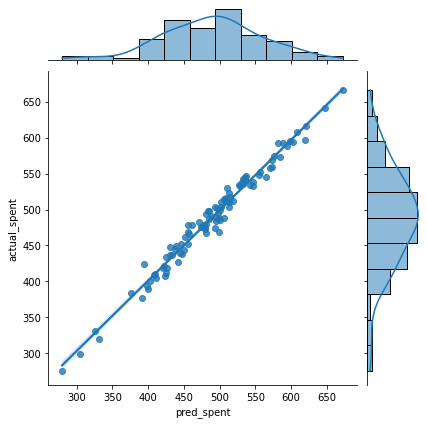

In [61]:
sns.jointplot(x='pred_spent',y='actual_spent',data=ecommerce_plot,kind='reg')

customer cluster prediction

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
data["Cluster"] = kmeans.fit_predict(data[['Time on App', 
'Time on Website','Avg. Session Length', 'Length of Membership','Yearly Amount Spent']])
data["Cluster"] = data["Cluster"].astype("category")

data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Cluster
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,3
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,4
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,0
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,3
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,3


In [66]:
for i in data['Cluster'].unique():
    print('Cluster', i, data[data['Cluster'] == i].describe())

Cluster 3        Avg. Session Length  ...  Yearly Amount Spent
count            72.000000  ...            72.000000
mean             33.621901  ...           592.186026
std               0.929925  ...            18.194641
min              31.283447  ...           565.994363
25%              33.078790  ...           576.721312
50%              33.669115  ...           588.869548
75%              34.199496  ...           604.896249
max              36.139662  ...           632.123588

[8 rows x 5 columns]
Cluster 4        Avg. Session Length  ...  Yearly Amount Spent
count           114.000000  ...           114.000000
mean             32.737418  ...           423.609323
std               0.969061  ...            20.311148
min              29.532429  ...           382.416108
25%              31.977617  ...           408.317723
50%              32.736836  ...           424.702027
75%              33.492580  ...           442.591218
max              34.606242  ...           453.169502

[8 

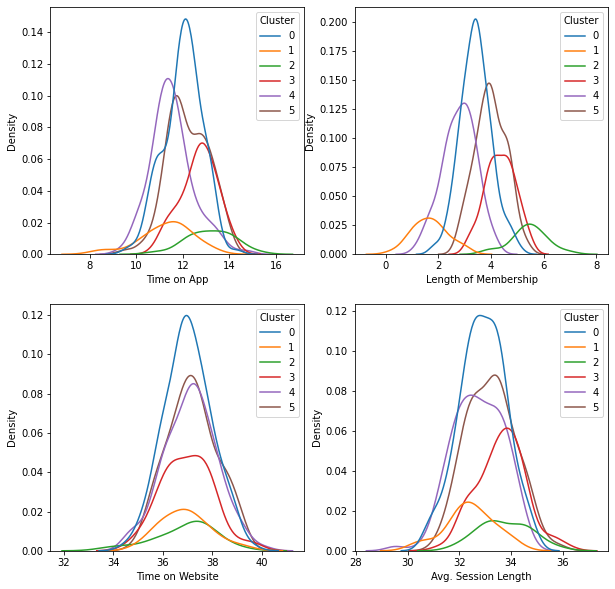

In [68]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = data, x = 'Time on App', hue = 'Cluster', ax = axs[0,0])
sns.kdeplot(data = data, x = 'Time on Website', hue = 'Cluster', ax = axs[1,0])
sns.kdeplot(data = data, x = 'Length of Membership', hue = 'Cluster', ax = axs[0,1])
sns.kdeplot(data = data, x = 'Avg. Session Length', hue = 'Cluster', ax = axs[1,1])

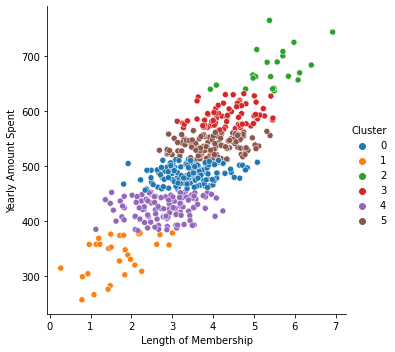

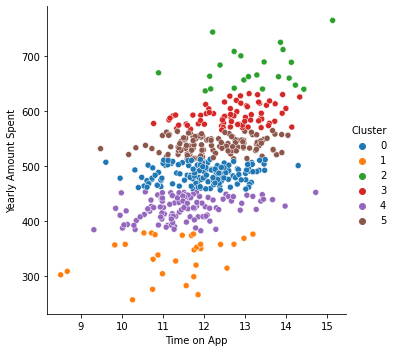

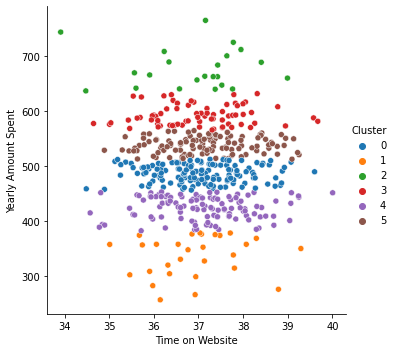

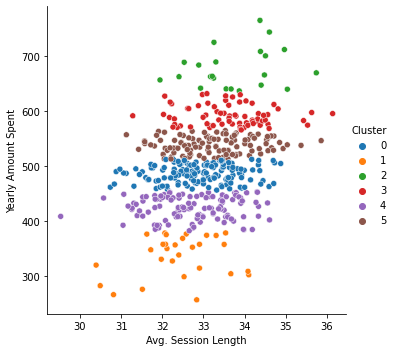

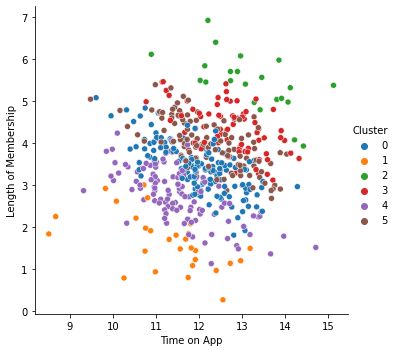

In [69]:
sns.relplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = data, hue = 'Cluster')
sns.relplot(x = 'Time on App', y = 'Yearly Amount Spent', data = data, hue = 'Cluster')
sns.relplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = data, hue = 'Cluster')
sns.relplot(x = 'Avg. Session Length', y = 'Yearly Amount Spent', data = data, hue = 'Cluster')
sns.relplot(x = 'Time on App', y = 'Length of Membership', data = data, hue = 'Cluster')

In [71]:
Average = data.groupby('Cluster').mean().reset_index()
Average.sort_values(by='Yearly Amount Spent')

,Cluster,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,1,32.418812,11.281808,36.903992,1.674359,336.736726
4,4,32.737418,11.527158,37.114031,2.794939,423.609323
0,0,32.904940,12.007519,37.020959,3.418587,486.655324
5,5,33.222122,12.212460,37.178658,3.991915,538.449407
3,3,33.621901,12.681947,36.979872,4.356664,592.186026
2,2,33.749959,13.178171,36.886075,5.441075,677.842699
